# Exploratory Data Analysis on Superstore Data

### Objectives:-

#### 1) To Perform Exploratory Data Analysis 

#### 2) Find out business problems 

#### 3) identify key areas for improving profits.

## 1. Importing required Packages and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("C:/Users/user/Downloads/SampleSuperstore.csv")
df.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


## 2. Data Inspection

In [3]:
df.shape

(9994, 13)

The Dataset contains 9994 rows and 13 features.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
#Statistics of Numerical valued colums
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [6]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

Here in the Dataset no null value is present

## 3. Data Cleaning

In [7]:
#Deleting Identicle rows to reduce noise from the data
df.drop_duplicates(keep= 'first',inplace=True)

In [8]:
df.shape

(9977, 13)

We can see that total number of rows reduced to 9977 from 9994, which implies that 17 rows were duplicate rows which would have affected in our analysis.

## 4. Exploratory Data Analysis and Visulization

### 4.1What are total Sales and Profits of the company?

In [9]:
Sales_and_Profits = df.groupby("Segment").sum().iloc[:,[1,-1]].sum()
round(Sales_and_Profits,2)

Sales     2296195.59
Profit     286241.42
dtype: float64

### Total Sales = $2296195.59

### Total Profit = $286241.42

### 4.2 Top 10 States by Profit and Sales

In [10]:
Top_10_Sales = df.groupby("State").Sales.sum().nlargest(n =10)
Top_10_Profits = df.groupby("State").Profit.sum().nlargest(n =10)

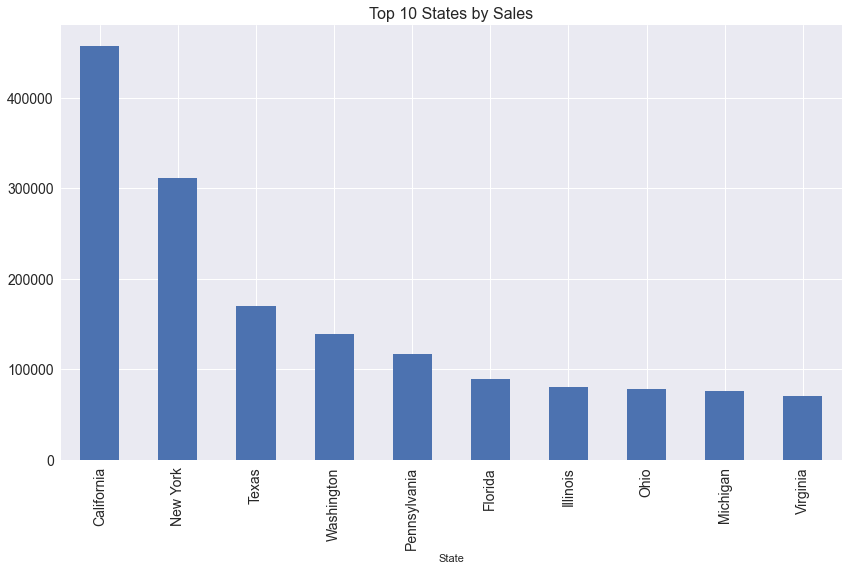

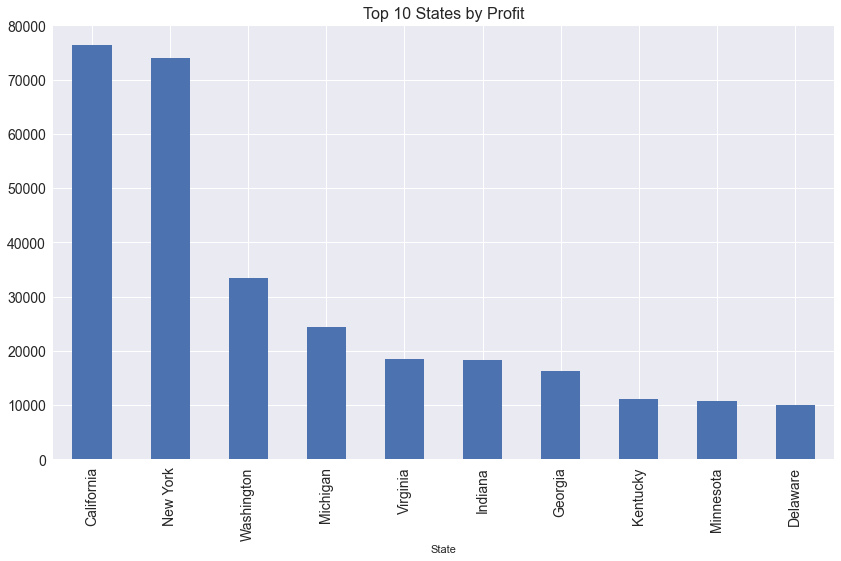

In [11]:
x=[Top_10_Sales, Top_10_Profits]
y=["Top 10 States by Sales","Top 10 States by Profit"]
for i in range(0,2):
    plt.style.use('seaborn')
    x[i].plot(kind ='bar', figsize =(14,8), fontsize =14)
    plt.title(y[i],fontsize =16)
    plt.show()

From the above two figure it is clear that California and New York are ahead of the rest of the states.

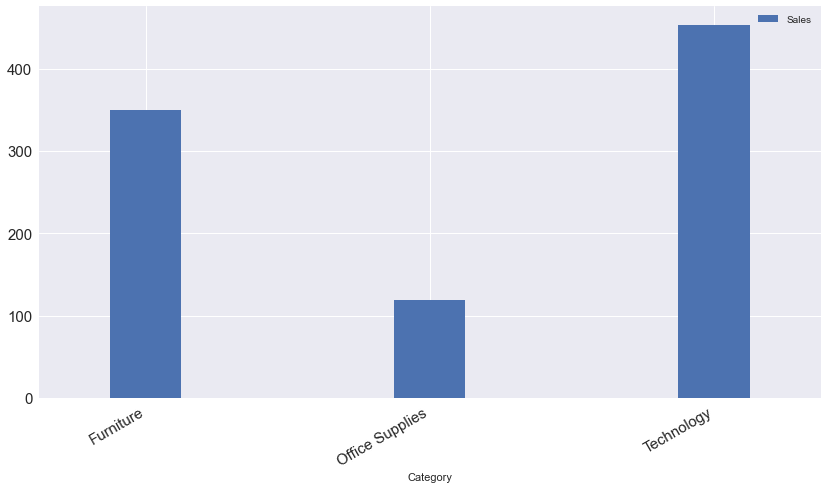

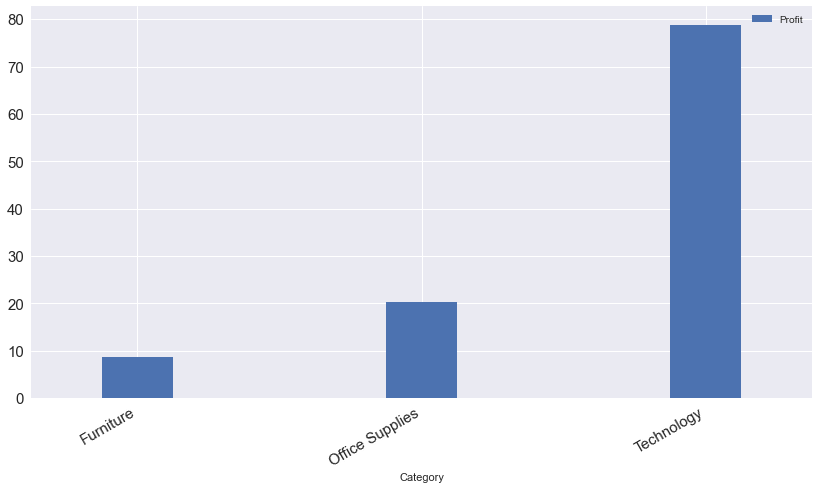

In [12]:
cols=['Sales','Profit']
for i in range(0,2):
    pivot=pd.pivot_table(df,index='Category',values=cols[i])
    pivot.plot(kind='bar', figsize=(14,8), width=0.25)
    plt.tick_params(labelsize=15)
    plt.gcf().autofmt_xdate()

From the above two graph we can say the following-
1. Sales and Profit of Technology Category is highest.
2. Sales and Profit of Office Supplies Category is lowest so we need to focus on that more.
3. Sales of Furniture Category is high but its Profit is very low. We need to figure out the reason behind its loss.

### 4.3 Relation among features

Now we will see if there are some relation among 'Sales', 'Profit', 'Discount' and 'Quantity' to get some insights about their correlation. 

<AxesSubplot:>

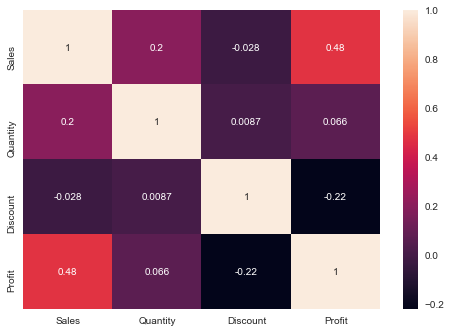

In [13]:
x1=df[['Sales','Quantity','Discount','Profit']]
correlation=x1.corr()
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True)

From the heatmap we can say that 'Profit' and 'Sales' are highly correlated whereas 'Discount' and 'Profit' are negatively correlated.

In [14]:
df['Discount'].value_counts()

0.00    4787
0.20    3653
0.70     418
0.80     299
0.30     226
0.40     206
0.60     138
0.10      94
0.50      66
0.15      52
0.32      27
0.45      11
Name: Discount, dtype: int64

To Understand how 'Discount' that were given are affecting 'Profit', we will consider the following cases-

1. When No Discount is given i.e Discount=0.00

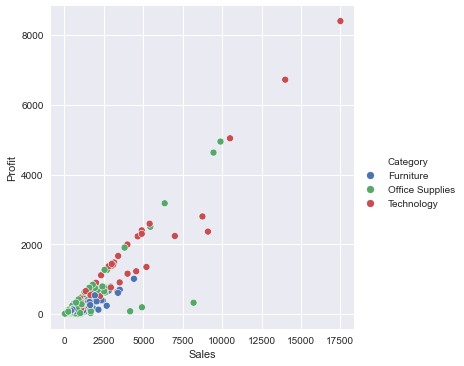

In [15]:
x2=df[df['Discount']==0]
sns.relplot(x='Sales',y='Profit',hue='Category',data=x2)

Seeing the graph, we can say that there is a positive growth between Profit and Sales when No Discount were given.

2. When Discounts were given

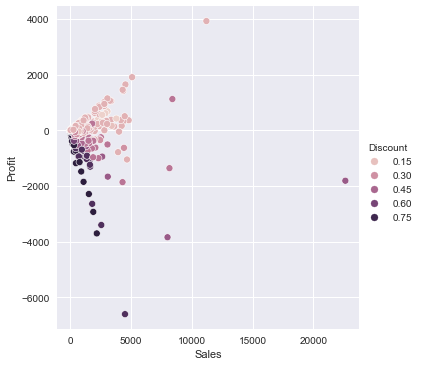

In [16]:
x3=df[df['Discount']!=0]
sns.relplot(x='Sales',y='Profit',hue='Discount',data=x3)

From the graph, we can say that as Discount increases, the Sales also increases but Profit decreases.

Now, we will see how increase in Discount is affecting Profit in different categories.

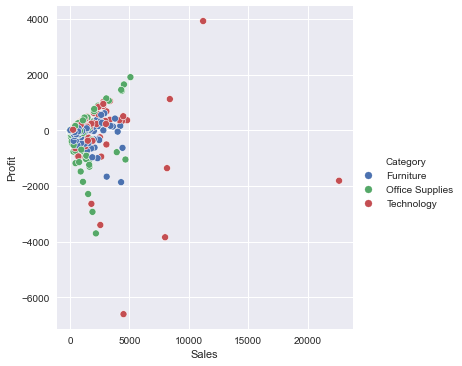

In [17]:
sns.relplot(x='Sales',y='Profit',hue='Category',data=x3)

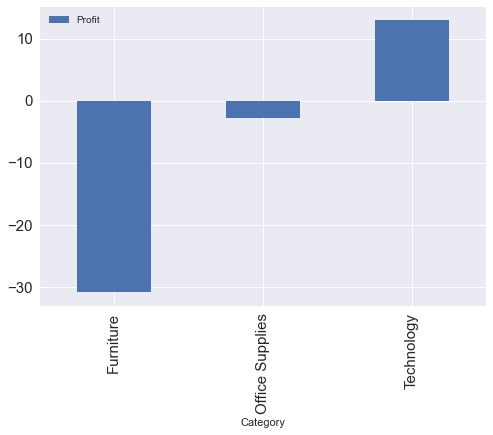

In [18]:
pivot=pd.pivot_table(x3,index='Category',values='Profit')
pivot.plot(kind='bar')
plt.tick_params(labelsize=15)

'Furniture' has the highest loss among the Categories followed by 'Office Supplies'. Now we will see which sub-category is the reason behind these losses. 

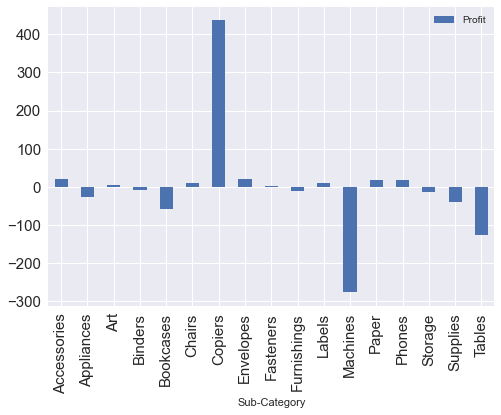

In [19]:
pivot=pd.pivot_table(x3,index='Sub-Category',values='Profit')
pivot.plot(kind='bar')
plt.tick_params(labelsize=15)

So, the graph says that Copiers have highest Profit when Discount is given. But, Machines have the highest loss followed by Tables, Bookcases, Supplies, Appliances, Storage.

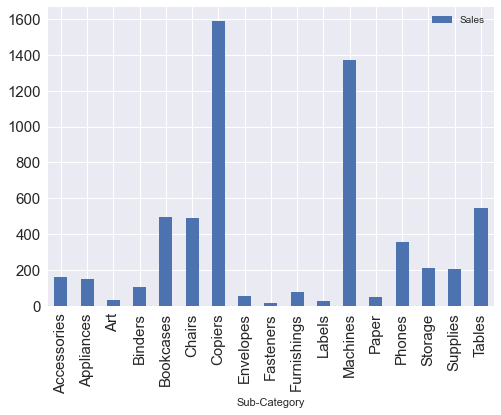

In [20]:
pivot=pd.pivot_table(x3,index='Sub-Category',values='Sales')
pivot.plot(kind='bar')
plt.tick_params(labelsize=15)

Also, when Discount is given, sales of Copiers is highest followed by Machines. Whereas, even after discount is given, sales of Fasteners, Labels, Art and Paper are relatively low. Hence we need to focus on these areas to increase sales. 

### 4.4 Profit distribution by Region

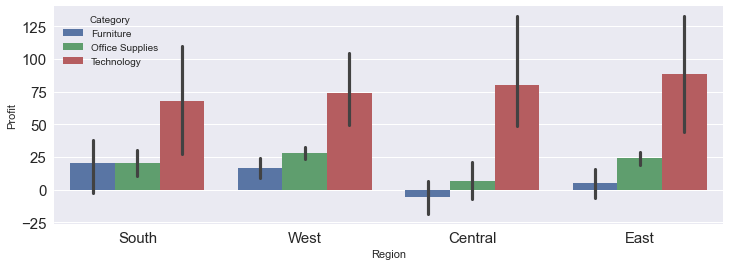

In [21]:
plt.figure(figsize = (12,4))
sns.barplot(x = "Region",y = "Profit" ,hue = "Category", data=df)
plt.tick_params(labelsize=15)
plt.show()

"Furniture" Category is the only loss making sector that to only in Central Region

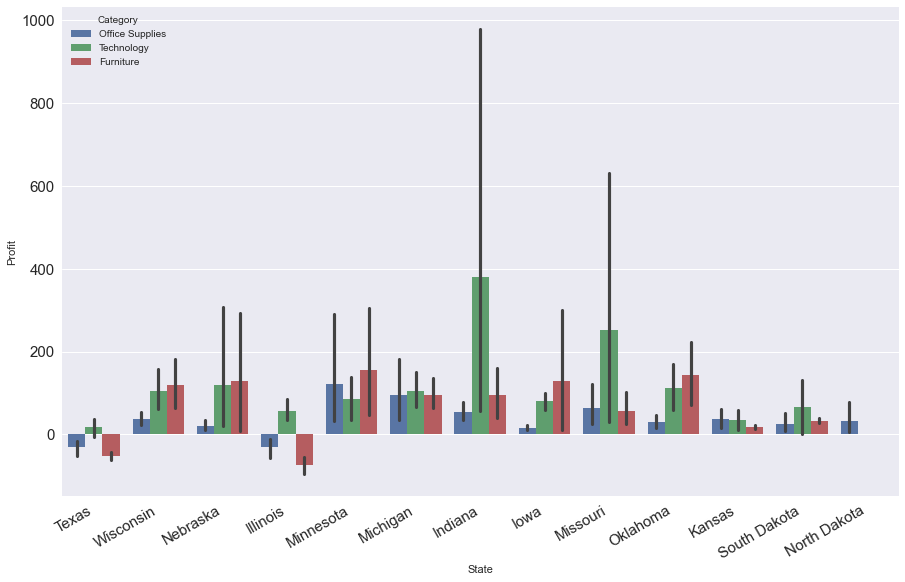

In [22]:
central_region = df[df['Region']=='Central']
plt.figure(figsize = (15,10))
sns.barplot(x = "State",y = "Profit" ,hue = "Category", data=central_region)
plt.tick_params(labelsize=15)
plt.gcf().autofmt_xdate()
plt.show()

'Texas' and 'Illinois' are the only two loss making states in Central Region. They are making losses in 'Furniture' and Office Supplies' category.
Let us see the reason behind the losses in these two states.

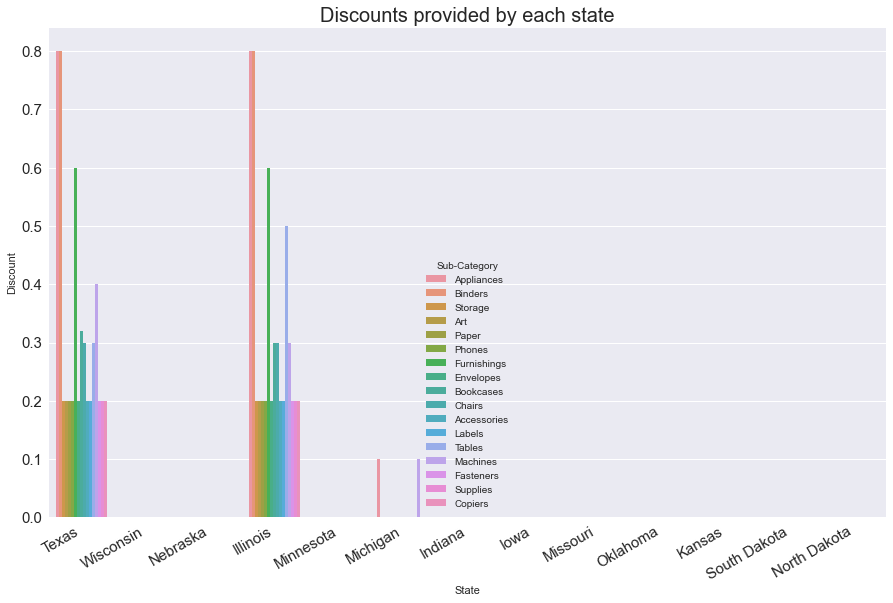

In [23]:
plt.figure(figsize = (15,10))
sns.barplot(x = "State",y = "Discount" ,hue = "Sub-Category", data= central_region)
plt.title("Discounts provided by each state", fontsize = 20)
plt.tick_params(labelsize=15)
plt.gcf().autofmt_xdate()
plt.show()

As we can see 'Texas' and 'Illinois' are the only two states that are providing discounts in the entire Central region.

Also the Discounts are very high!

Are these Discounts driving Sales Up? Let us find out about that.

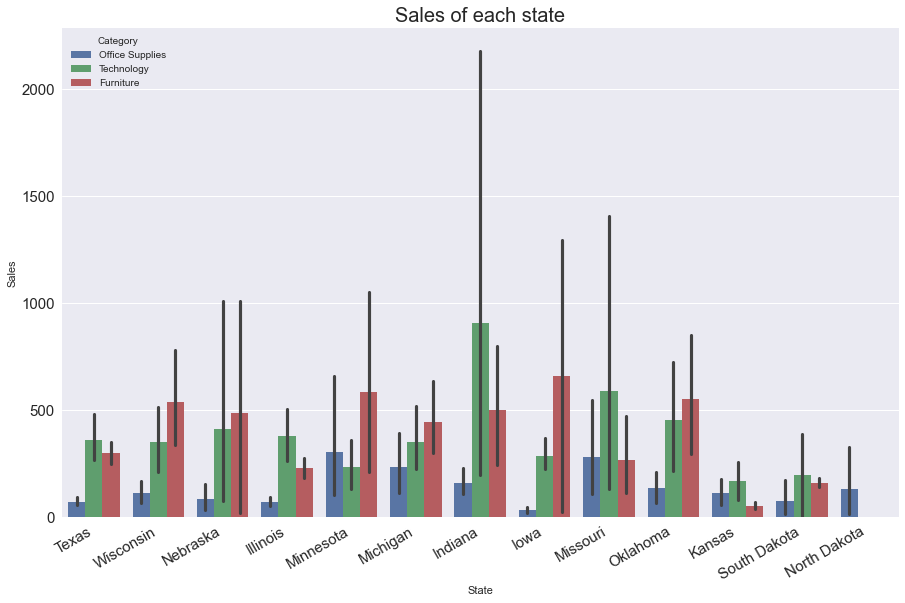

In [24]:
plt.figure(figsize = (15,10))
sns.barplot(x = "State",y = "Sales" ,hue = "Category", data= central_region)
plt.title("Sales of each state", fontsize = 20)
plt.tick_params(labelsize=15)
plt.gcf().autofmt_xdate()
plt.show()

Thus, our answer to the previous question is NO! Although huge discounts are given, the sales of the two states('Texas' and 'Illinois') are relatively very low.

## Insights from Exploratory Data Analysis (Summary)

### What are total Sales and Profits of the company?

Total Sales = $2296195.59

Total Profit = $286241.42

### 4.2 Top 10 States by Sales and Profits

#### Top 10 States by Sales: 'California', 'New York', 'Texas', 'Washington', 'Pennsylvania','Florida', 'Illinois', 'Ohio', 'Michigan', 'Virginia'
#### Top 10 States by Profit: 'California', 'New York', 'Washington', 'Michigan', 'Virginia','Indiana', 'Georgia', 'Kentucky', 'Minnesota', 'Delaware'
#### Californi and New York are far ahead of their competitor states in terms of Profits.

### 4.3 Distrubution of Sales and Profits in different Category 
Technology ahs highest sales and profit, whereas, Office supplies has lowest sales and profit. Furniture has high sales but low profit.

### 4.4 Profit distribution by Region
"Furniture" Category is the only loss making sector that to only in Central Region. Discounts are triggering these losses.

### 4.5 Investigating individual performance by states in the central region
Texas and Illiois are only two states contributing to all the losses in Furniture category in the Central Region
Losses in Tables Sub Category is significanlty high.

### 4.6 So, what is it they are doing diffrently?
Texas and Illinois are only states providing discounts in the whole central region this justifies high positive correlation between postal codes and discounts.
Also, these discounts are crazy high!
80% on Appliances
60% on Furnishings
30% on Bookcases and Chairs
50% disount on Tables in Illinois and 30% in Texas
30% discount on Machines in Illinois and 40% in Texas

### 4.7 Are these discounts driving sales up?.... NO!
Even after giving high Discounts, the sales of these two states are still very less compared to others.

## After analysis of entire data, we can conclude that-

### The Sales of product increases when Discount is given, but Profit goes down.
### California and New York are the ahead of others in terms of sales and profit. Hence we should focus selling more products in those states.
### ‘Technology’ category has more profit than ‘Furniture’ and ‘Office Supplies’. Whereas, Office Supplies has lowest sales and profit, so we need to focus on this category more. 
### Furniture Category is in loss as profit is lowest although its sales is high.
### Sales of ‘Fasteners’, ‘Labels’ and ‘Art’ is very low. Hence, we need to focus in increasing its sales.
### Central region is the only region with negative profit in ‘Furniture’ and ‘Office Supplies’ category. This is due to high discount given by the Texas and Illinois state having very low sales rate.

### Hence, to get good profit in any business we have to focus on increasing sales but not giving more discount. And also we have to increase sales in highest profit making areas.